#### Machine Learning model to predict if the number of games in the match is over or under 21.5. Only Games with 3 sets will be analysed

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


#### Data downloaded from tennis-data.co.uk

In [2]:
#Importing Data
dft = pd.read_csv('Tennis_Data.csv')

## Data Transformation, Exploration, and Cleaning 

In [3]:
dft.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,...,1.0,Completed,1.44,2.62,1.526,2.740,NaN,NaN,NaN,NaN
1,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Odesnik W.,...,0.0,Completed,2.25,1.57,2.140,1.813,NaN,NaN,NaN,NaN
2,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Gicquel M.,...,0.0,Completed,1.61,2.20,1.676,2.360,NaN,NaN,NaN,NaN
3,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Falla A.,...,0.0,Completed,2.62,1.44,2.580,1.581,NaN,NaN,NaN,NaN
4,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Levy H.,...,0.0,Completed,3.00,1.36,2.170,1.787,NaN,NaN,NaN,NaN


#### Data contains 30084 rows and 36 columns

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30084 entries, 0 to 30083
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         30084 non-null  int64  
 1   Location    30084 non-null  object 
 2   Tournament  30084 non-null  object 
 3   Date        30084 non-null  object 
 4   Series      30084 non-null  object 
 5   Court       30084 non-null  object 
 6   Surface     30084 non-null  object 
 7   Round       30084 non-null  object 
 8   Best of     30084 non-null  int64  
 9   Winner      30084 non-null  object 
 10  Loser       30084 non-null  object 
 11  WRank       30072 non-null  float64
 12  LRank       30020 non-null  float64
 13  WPts        30074 non-null  float64
 14  LPts        30021 non-null  float64
 15  W1          29890 non-null  float64
 16  L1          29893 non-null  float64
 17  W2          29610 non-null  float64
 18  L2          29610 non-null  float64
 19  W3          14274 non-nul

#### ATP Tournaments have a max 3 of sets, Grand Slams have a max of 5. This study is focused in 3 sets tournaments, therefore the rows where 'Best of' column contains 5 needs to be dropped

In [5]:
dft[['Best of']].value_counts()

Best of
3          24126
5           5958
dtype: int64

In [6]:
dft.drop(dft.index[dft['Best of'] == 5], inplace=True)

In [7]:
dft[['Best of']].value_counts()

Best of
3          24126
dtype: int64

In [8]:
dft.drop(dft.index[dft['Series'] == 'Grand Slam'], inplace=True)

In [9]:
dft.drop(dft.index[dft['Series'] == 'Masters Cup'], inplace=True)

#### Only matches completed are relevant to the model, therefore 'Comment' not completed should be dropped

In [10]:
dft[['Comment']].value_counts()

Comment     
Completed       23081
Retired           688
Walkover          162
Awarded             2
Disqualified        1
Rrtired             1
dtype: int64

In [11]:
dft.drop(dft.index[dft['Comment'] != "Completed"], inplace=True)

In [12]:
dft[['Comment']].value_counts()

Comment  
Completed    23081
dtype: int64

#### As some matches don't have 3rd set, change the empty to zero is needed to add the values and create Total Games column

In [13]:
dft['W3'] = dft['W3'].fillna(0)
dft['L3'] = dft['L3'].fillna(0)

#### Adding Total Games Column

In [14]:
dft['Total_Games'] = dft['W1'] + dft['L1']+dft['W2']+dft['L2']+dft['W3']+dft['L3']

In [15]:
dft['Total_Games']

0        29.0
1        23.0
2        16.0
3        20.0
4        14.0
         ... 
30064    26.0
30065    31.0
30066    35.0
30067    22.0
30068    28.0
Name: Total_Games, Length: 23081, dtype: float64

#### Create binary values for over and under 21.5 games

In [16]:
dft['Over_21.5'] = np.where(dft['Total_Games']>21,1,0)

In [17]:
dft['Over_21.5']

0        1
1        1
2        0
3        0
4        0
        ..
30064    1
30065    1
30066    1
30067    1
30068    1
Name: Over_21.5, Length: 23081, dtype: int32

#### Adding Ranking difference

In [18]:
dft['DRank'] = dft['WRank'] - dft['LRank']
dft['DRank'] = dft['DRank'].abs()

In [19]:
#To drop an error where players had the same Rank
dft.drop(dft.index[dft['DRank'] == 0], inplace=True)

#### Adding Points difference

In [20]:
dft['DPts'] = dft['WPts'] - dft['LPts']
dft['DPts'] = dft['DPts'].abs()

In [21]:
#dft['DPts'] = dft['DPts'].replace(['0'],'1')

#### Checking how many matches are over/under 21.5 games

In [22]:
dft[['Over_21.5']].value_counts()

Over_21.5
1            12248
0            10832
dtype: int64

In [23]:
dft[['Over_21.5']].value_counts(normalize = True)

Over_21.5
1            0.530676
0            0.469324
dtype: float64

#### Checking for missing values

In [24]:
dft.isnull().sum()

ATP                0
Location           0
Tournament         0
Date               0
Series             0
Court              0
Surface            0
Round              0
Best of            0
Winner             0
Loser              0
WRank             12
LRank             53
WPts              10
LPts              52
W1                 0
L1                 0
W2                 2
L2                 2
W3                 0
L3                 0
W4             23079
L4             23079
W5             23080
L5             23080
Wsets              0
Lsets              0
Comment            0
B365W            112
B365L            106
PSW              141
PSL              141
MaxW             807
MaxL             807
AvgW             807
AvgL             807
Total_Games        2
Over_21.5          0
DRank             65
DPts              62
dtype: int64

#### Dropping missing values <br> Check why sintax dft = dft.dropna(subset = ['LRank','WRank','W2','L2'], how = 'all') is not valid


In [25]:
dft = dft.dropna(subset = ['LRank'], how = 'all')
dft = dft.dropna(subset = ['WRank'], how = 'all')
dft = dft.dropna(subset = ['W2'], how = 'all')
dft = dft.dropna(subset = ['L2'], how = 'all')
dft = dft.dropna(subset = ['PSW'], how = 'all')
dft = dft.dropna(subset = ['PSL'], how = 'all')

In [26]:
dft.isnull().sum()

ATP                0
Location           0
Tournament         0
Date               0
Series             0
Court              0
Surface            0
Round              0
Best of            0
Winner             0
Loser              0
WRank              0
LRank              0
WPts               0
LPts               0
W1                 0
L1                 0
W2                 0
L2                 0
W3                 0
L3                 0
W4             22872
L4             22872
W5             22873
L5             22873
Wsets              0
Lsets              0
Comment            0
B365W             32
B365L             27
PSW                0
PSL                0
MaxW             773
MaxL             773
AvgW             773
AvgL             773
Total_Games        0
Over_21.5          0
DRank              0
DPts               0
dtype: int64

In [27]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22873 entries, 0 to 30068
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ATP          22873 non-null  int64  
 1   Location     22873 non-null  object 
 2   Tournament   22873 non-null  object 
 3   Date         22873 non-null  object 
 4   Series       22873 non-null  object 
 5   Court        22873 non-null  object 
 6   Surface      22873 non-null  object 
 7   Round        22873 non-null  object 
 8   Best of      22873 non-null  int64  
 9   Winner       22873 non-null  object 
 10  Loser        22873 non-null  object 
 11  WRank        22873 non-null  float64
 12  LRank        22873 non-null  float64
 13  WPts         22873 non-null  float64
 14  LPts         22873 non-null  float64
 15  W1           22873 non-null  float64
 16  L1           22873 non-null  float64
 17  W2           22873 non-null  float64
 18  L2           22873 non-null  float64
 19  W3  

In [28]:
dft['Total_Games'].describe()

count    22873.000000
mean        23.274472
std          5.925232
min         12.000000
25%         19.000000
50%         22.000000
75%         28.000000
max         39.000000
Name: Total_Games, dtype: float64

<AxesSubplot:xlabel='Total_Games', ylabel='Count'>

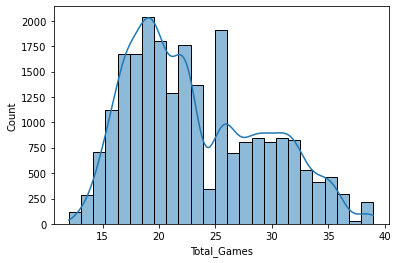

In [29]:
sns.histplot(dft['Total_Games'],bins=25, kde=True)

<AxesSubplot:xlabel='Total_Games', ylabel='Density'>

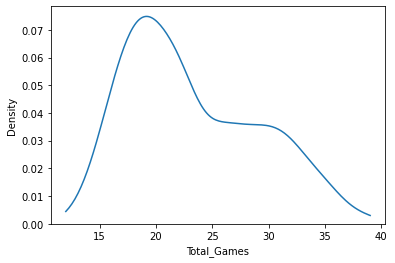

In [30]:
sns.kdeplot(dft['Total_Games'],bw_adjust=2,cut=0)

In [31]:
dft.groupby('Surface')[['Total_Games']].mean().sort_values(by='Total_Games')

,Total_Games
Surface,
Clay,22.945957
Hard,23.370524
Grass,23.884194


In [32]:
dft.groupby('Court')[['Total_Games']].mean().sort_values(by='Total_Games')

,Total_Games
Court,
Outdoor,23.194444
Indoor,23.559298


<AxesSubplot:xlabel='Over_21.5', ylabel='count'>

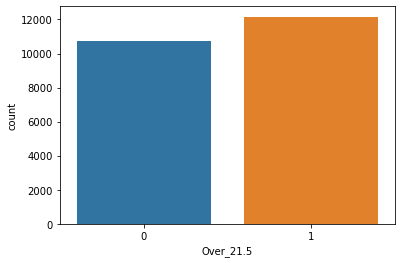

In [33]:
sns.countplot(x = 'Over_21.5', data=dft)

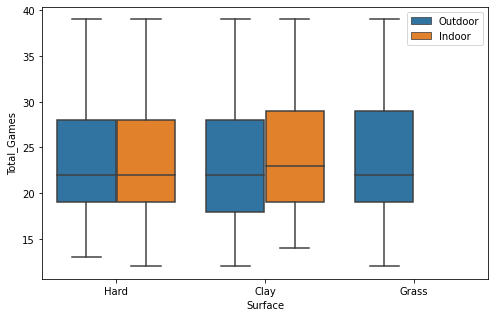

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Surface', y='Total_Games', hue='Court', data=dft)
plt.legend(loc=1)

<AxesSubplot:xlabel='Court', ylabel='Total_Games'>

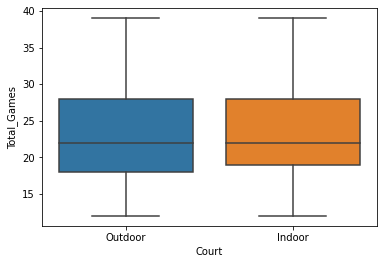

In [35]:
sns.boxplot(x='Court', y='Total_Games', data=dft)

<AxesSubplot:xlabel='Series', ylabel='Total_Games'>

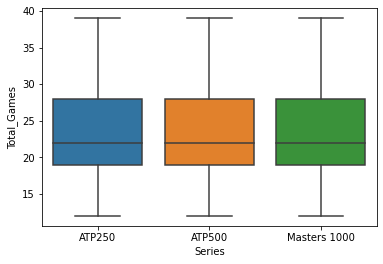

In [36]:
sns.boxplot(x='Series', y='Total_Games', data=dft)

<AxesSubplot:xlabel='Round', ylabel='Total_Games'>

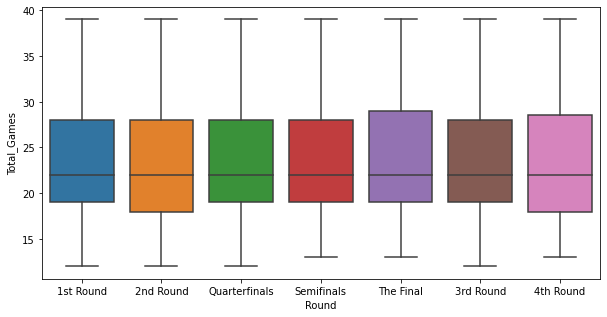

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Round', y='Total_Games', data=dft)

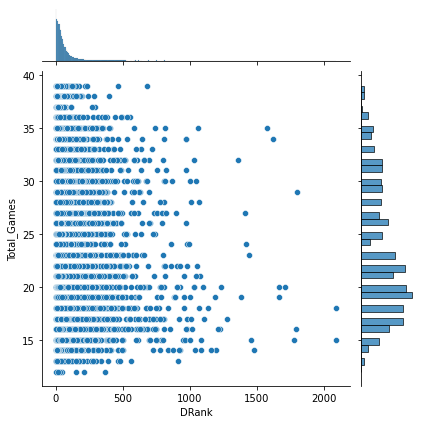

In [38]:
sns.jointplot(x='DRank', y='Total_Games', data=dft)

<AxesSubplot:xlabel='DRank', ylabel='Count'>

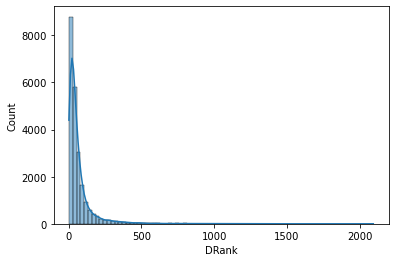

In [39]:
sns.histplot(dft['DRank'],bins=80, kde=True)

<AxesSubplot:xlabel='DPts', ylabel='Count'>

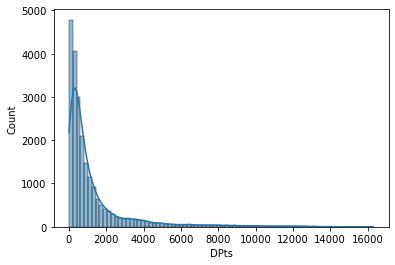

In [40]:
sns.histplot(dft['DPts'],bins=80, kde=True)

### Normalizing the data Z score

In [41]:
dft['DRank_zm'] = StandardScaler().fit_transform(dft[['DRank']])
dft['DPts_zm'] = StandardScaler().fit_transform(dft[['DPts']])
dft['PSW_zm'] = StandardScaler().fit_transform(dft[['PSW']])
dft['PSL_zm'] = StandardScaler().fit_transform(dft[['PSL']])

<AxesSubplot:xlabel='DPts_zm', ylabel='Count'>

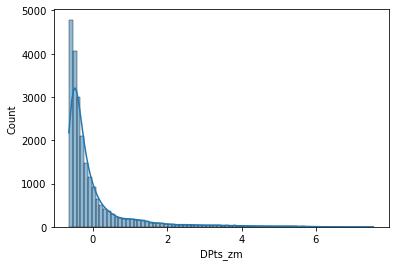

In [42]:
sns.histplot(dft['DPts_zm'],bins=80, kde=True)

### Encoding Categorical Features

#### As the Round of the tournament is Ordinal is going to be mapped individually

In [43]:
Round_mapping = {'1st Round':0, '2nd Round':1, '3rd Round':2,
                 '4th Round':3, 'Quarterfinals':4, 'Semifinals':5,
                'The Final':6}
dft['RoundEnco'] = dft['Round'].map(Round_mapping)

In [44]:
dft['Round'].value_counts()

1st Round        10006
2nd Round         6749
Quarterfinals     2645
Semifinals        1326
3rd Round         1301
The Final          675
4th Round          171
Name: Round, dtype: int64

In [45]:
dft['RoundEnco'].value_counts()

0    10006
1     6749
4     2645
5     1326
2     1301
6      675
3      171
Name: RoundEnco, dtype: int64

#### Categorical variable using One Hot Encoding

In [46]:
dft['Surface'].unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [47]:
ohe = OneHotEncoder(sparse=False)

In [48]:
print(ohe)

OneHotEncoder(sparse=False)


In [49]:
encoded_arry = ohe.fit_transform(dft[['Surface']])

In [50]:
ohe.categories_

[array(['Clay', 'Grass', 'Hard'], dtype=object)]

In [51]:
encoded_labels = ohe.categories_

In [52]:
dft_encoded = pd.DataFrame(encoded_arry, columns = encoded_labels )

In [53]:
dft_encoded['Hard'].describe()

,Hard
count,22873.000000
mean,0.588554
std,0.492106
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [54]:
new_dft = dft.reset_index(drop=True)

In [55]:
result = pd.concat([new_dft,dft_encoded], axis=1)

In [56]:
result

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,DRank,DPts,DRank_zm,DPts_zm,PSW_zm,PSL_zm,RoundEnco,"(Clay,)","(Grass,)","(Hard,)"
0,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,...,36.0,282.0,-0.293192,-0.508353,-0.348671,-0.206079,0,0.0,0.0,1.0
1,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Odesnik W.,...,42.0,146.0,-0.238838,-0.576725,0.175435,-0.458377,0,0.0,0.0,1.0
2,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Gicquel M.,...,22.0,157.0,-0.420017,-0.571195,-0.220632,-0.309502,0,0.0,0.0,1.0
3,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Falla A.,...,49.0,515.0,-0.175425,-0.391215,0.551016,-0.521519,0,0.0,0.0,1.0
4,1,Brisbane,Brisbane International,04/01/2010,ATP250,Outdoor,Hard,1st Round,3,Levy H.,...,52.0,188.0,-0.148248,-0.555610,0.201043,-0.465453,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22868,60,Stockholm,Stockholm Open,11/11/2021,ATP250,Indoor,Hard,Quarterfinals,3,Paul T.,...,91.0,643.0,0.205051,-0.326864,0.448585,-0.510905,4,0.0,0.0,1.0
22869,60,Stockholm,Stockholm Open,11/11/2021,ATP250,Indoor,Hard,Quarterfinals,3,Shapovalov D.,...,42.0,1348.0,-0.238838,0.027566,-0.464760,-0.053667,4,0.0,0.0,1.0
22870,60,Stockholm,Stockholm Open,12/11/2021,ATP250,Indoor,Hard,Semifinals,3,Paul T.,...,11.0,303.0,-0.519666,-0.497795,0.431513,-0.508183,5,0.0,0.0,1.0
22871,60,Stockholm,Stockholm Open,12/11/2021,ATP250,Indoor,Hard,Semifinals,3,Shapovalov D.,...,7.0,915.0,-0.555902,-0.190119,0.346154,-0.494575,5,0.0,0.0,1.0


In [57]:
dft['Surface'].describe()

count     22873
unique        3
top        Hard
freq      13462
Name: Surface, dtype: object

### Selecting the features

In [58]:
list(result.columns)

['ATP',
 'Location',
 'Tournament',
 'Date',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Best of',
 'Winner',
 'Loser',
 'WRank',
 'LRank',
 'WPts',
 'LPts',
 'W1',
 'L1',
 'W2',
 'L2',
 'W3',
 'L3',
 'W4',
 'L4',
 'W5',
 'L5',
 'Wsets',
 'Lsets',
 'Comment',
 'B365W',
 'B365L',
 'PSW',
 'PSL',
 'MaxW',
 'MaxL',
 'AvgW',
 'AvgL',
 'Total_Games',
 'Over_21.5',
 'DRank',
 'DPts',
 'DRank_zm',
 'DPts_zm',
 'PSW_zm',
 'PSL_zm',
 'RoundEnco',
 ('Clay',),
 ('Grass',),
 ('Hard',)]

In [59]:
result.drop(['ATP','Location','Tournament','Date','Series','Court','Best of',
          'Winner','Loser','WRank','LRank','WPts','LPts','W1','L1','W2',
          'L2','W3','L3','W4','L4','W5','L5','Wsets','Lsets','Comment',
          'MaxW','MaxL','AvgW','AvgL','Total_Games','B365W','B365L',
         'DRank','DPts','Round','Surface','PSW','PSL'],axis = 1, inplace=True)

In [60]:
list(result.columns)

['Over_21.5',
 'DRank_zm',
 'DPts_zm',
 'PSW_zm',
 'PSL_zm',
 'RoundEnco',
 ('Clay',),
 ('Grass',),
 ('Hard',)]

In [61]:
result

,Over_21.5,DRank_zm,DPts_zm,PSW_zm,PSL_zm,RoundEnco,"(Clay,)","(Grass,)","(Hard,)"
0,1,-0.293192,-0.508353,-0.348671,-0.206079,0,0.0,0.0,1.0
1,1,-0.238838,-0.576725,0.175435,-0.458377,0,0.0,0.0,1.0
2,0,-0.420017,-0.571195,-0.220632,-0.309502,0,0.0,0.0,1.0
3,0,-0.175425,-0.391215,0.551016,-0.521519,0,0.0,0.0,1.0
4,0,-0.148248,-0.555610,0.201043,-0.465453,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
22868,1,0.205051,-0.326864,0.448585,-0.510905,4,0.0,0.0,1.0
22869,1,-0.238838,0.027566,-0.464760,-0.053667,4,0.0,0.0,1.0
22870,1,-0.519666,-0.497795,0.431513,-0.508183,5,0.0,0.0,1.0
22871,1,-0.555902,-0.190119,0.346154,-0.494575,5,0.0,0.0,1.0


### Split data into train, validation and test (Split in 60% 20% 20%)

In [62]:
features = result.drop('Over_21.5',axis = 1)
labels = result['Over_21.5']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [63]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Write out all data

In [64]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)